## Run this to save the notebook to DagsHub 👇

In [1]:
# Install the DagsHub python client
!pip install -q dagshub


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━

In [2]:
from dagshub.notebook import save_notebook

save_notebook(repo="Omdena/ParisFranceChapter_HousingAffordabilityAnalysis", path="src/tasks/task-2a-data-analysis")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=78e995f9-e0cb-4210-abd3-be14dd6d4a81&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=b8b1d15e737aac1ab292489cab818d9dd4689064f4c4656c36b28e378dfdc3ec




Output()

Accessing as nethmidesilva2000

Uploading files (1) to "Omdena/ParisFranceChapter_HousingAffordabilityAnalysis"...

Upload finished successfully!

First few rows of the dataset:
                                       Name                    Status  \
0         Paris 1er Arrondissement (Louvre)  Municipal Arrondissement   
1          Paris 2e Arrondissement (Bourse)  Municipal Arrondissement   
2          Paris 3e Arrondissement (Temple)  Municipal Arrondissement   
3  Paris 4e Arrondissement (Hôtel-de-Ville)  Municipal Arrondissement   
4        Paris 5e Arrondissement (Panthéon)  Municipal Arrondissement   

   Population Census 1975-02-20  Population Census 1982-03-04  \
0                         22793                         18509   
1                         26328                         21203   
2                         41706                         36094   
3                         40466                         33990   
4                         67668                         62173   

   Population Census 1990-03-05  Population Census 1999-03-08  \
0                         18360                         16888   
1        

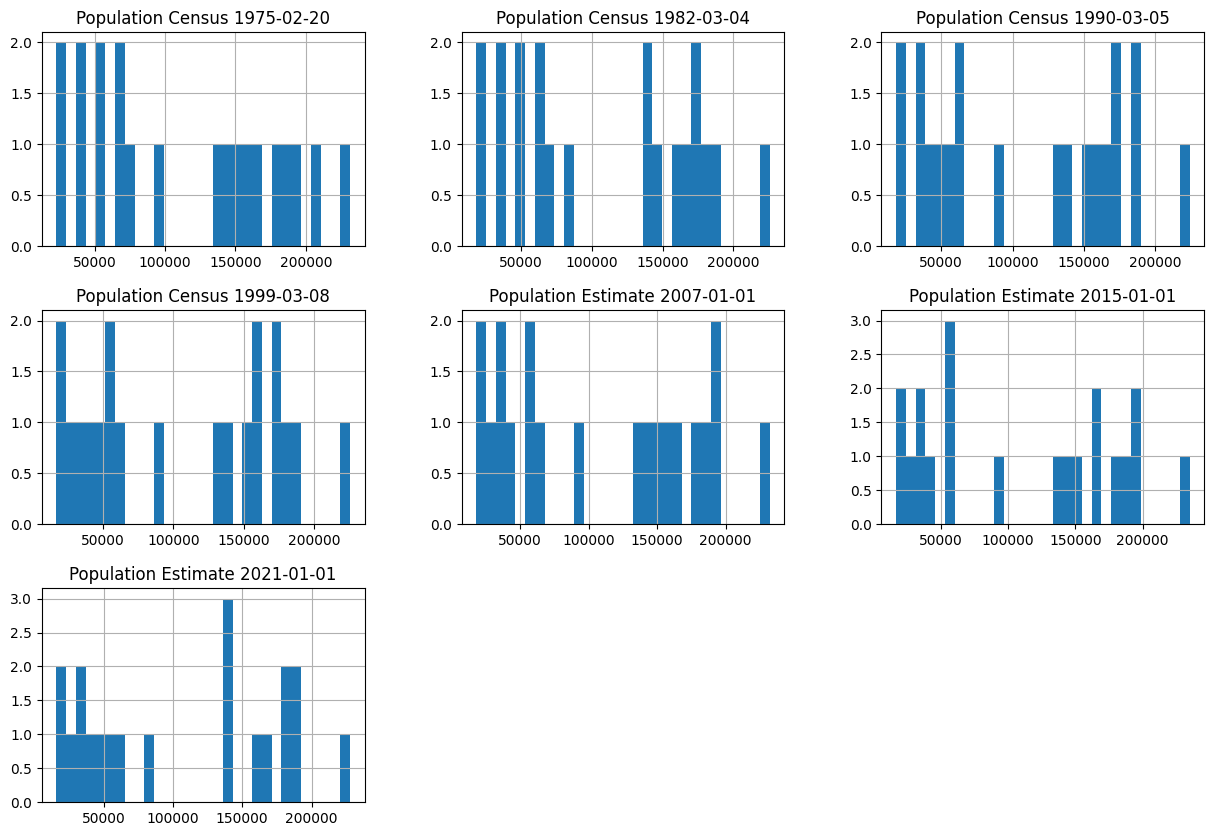

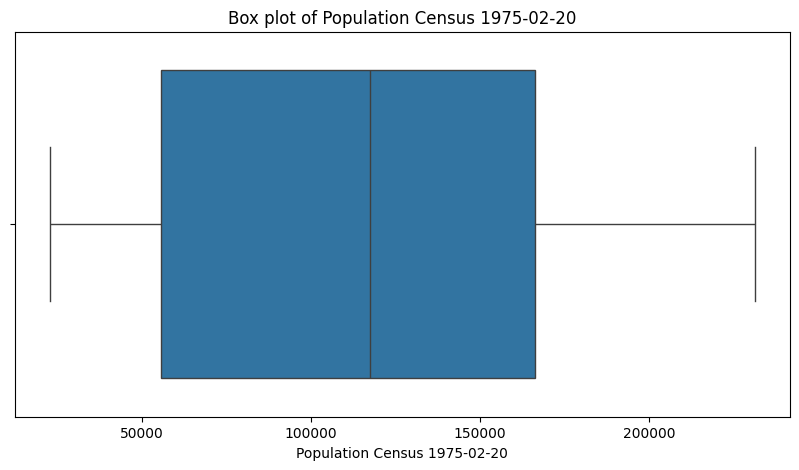

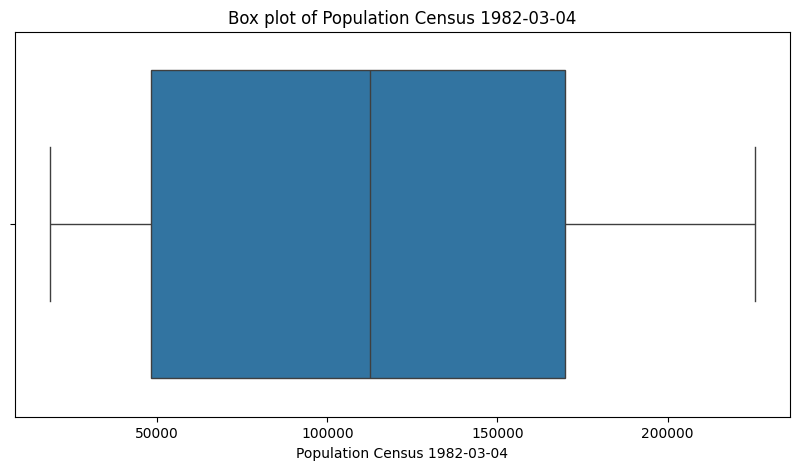

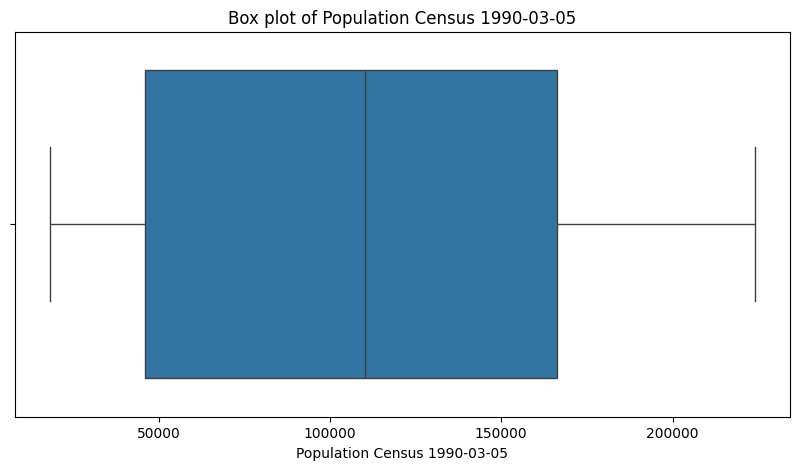

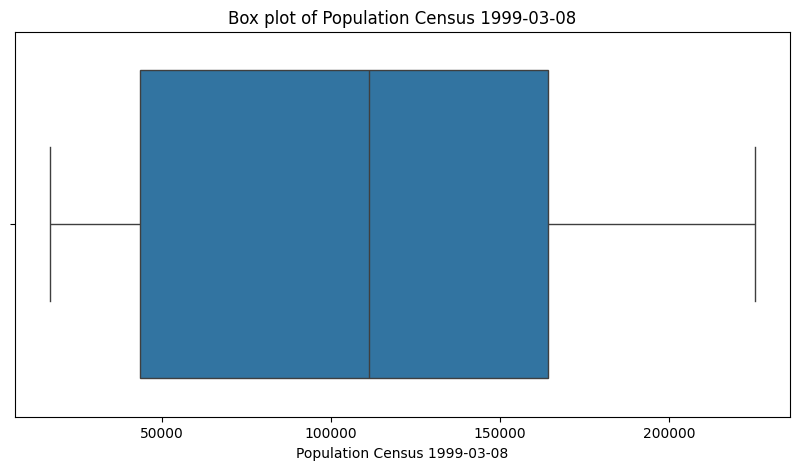

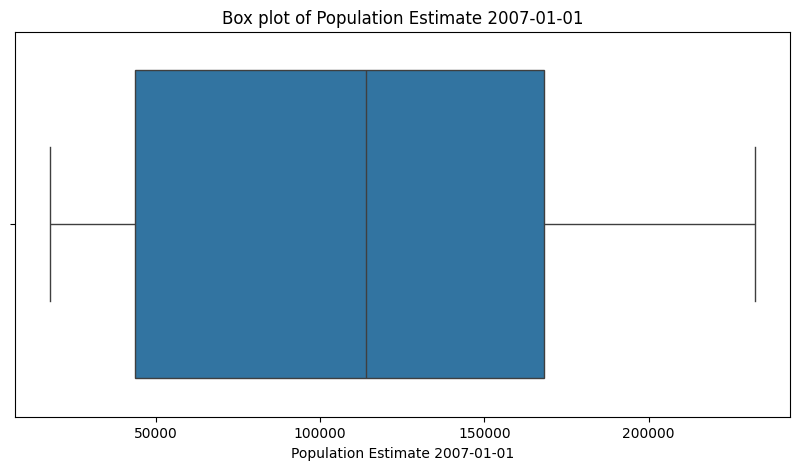

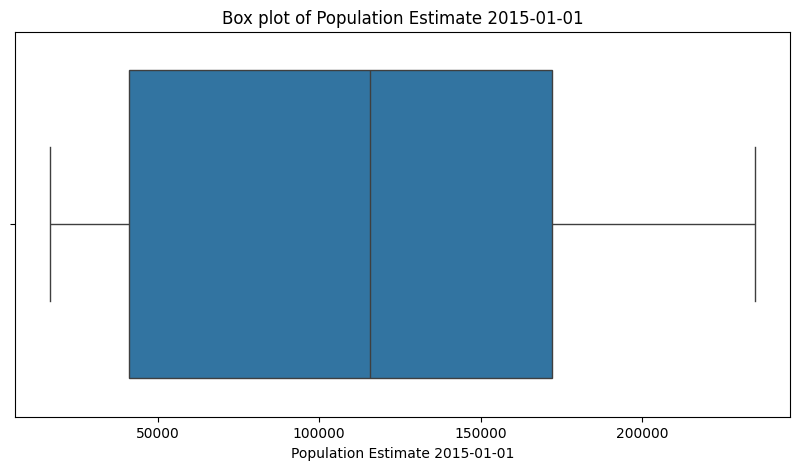

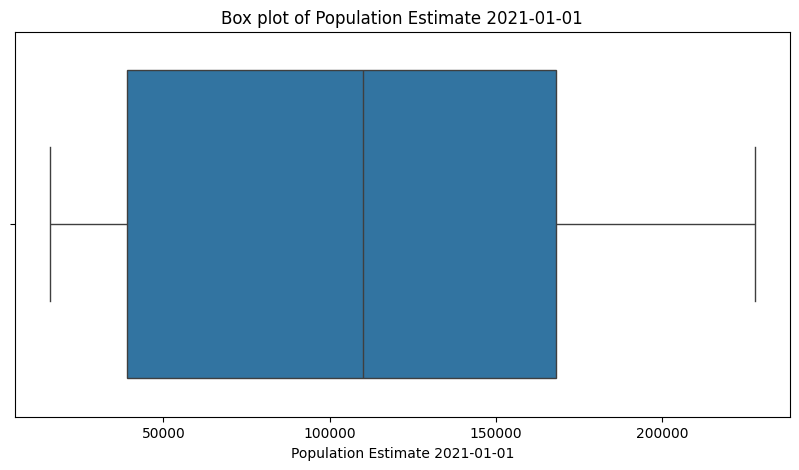

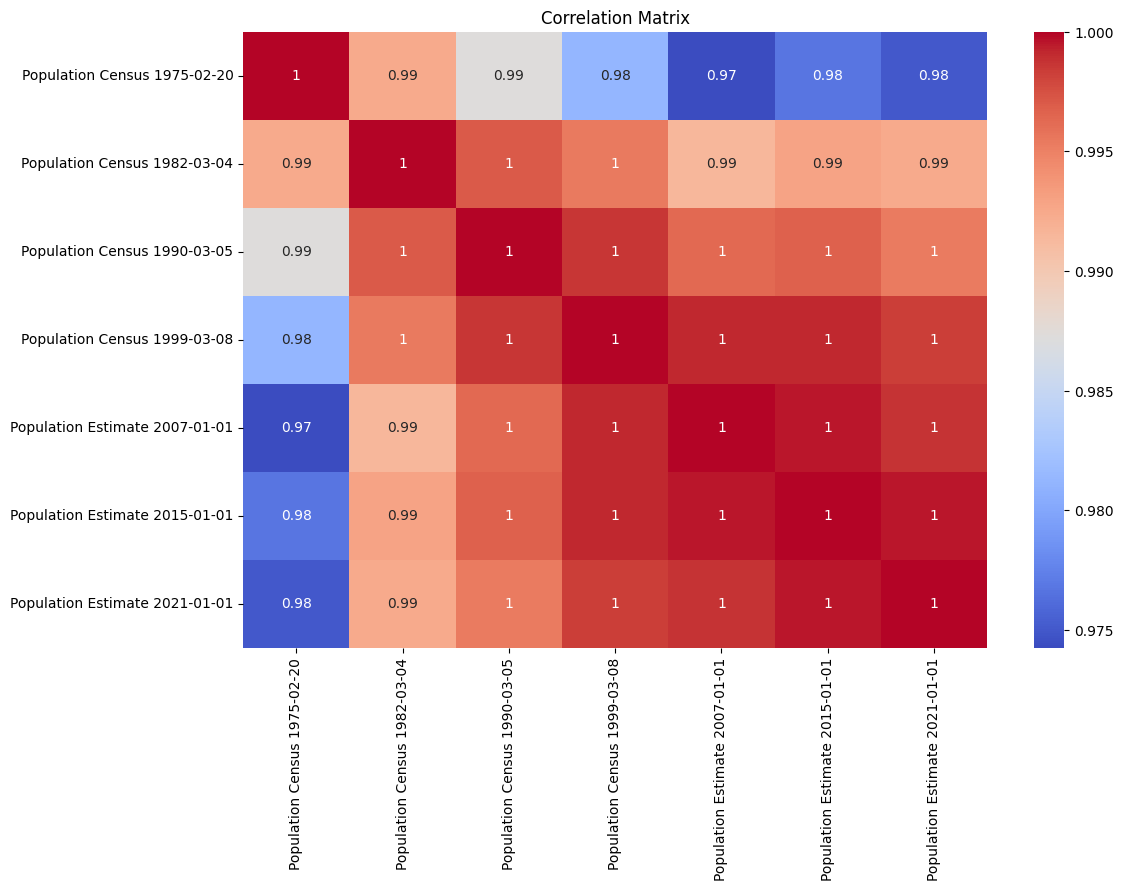


Cleaned data saved to /cleaned_population_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
file_path = '/Population in Municipal Arrondissements.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check the shape of the dataset
print(f"\nDataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Handle missing values (if any) for numerical columns only
data_numeric = data.select_dtypes(include=[np.number])
data_numeric.fillna(data_numeric.mean(), inplace=True)

# Replace the original numerical columns with the filled ones
for column in data_numeric.columns:
    data[column] = data_numeric[column]

print(f"\nMissing values after handling:\n{data.isnull().sum()}")

# Identify and handle outliers using Z-score for numerical columns
z_scores = np.abs(stats.zscore(data_numeric))
outliers = (z_scores > 3).any(axis=1)
data_cleaned = data[~outliers]
print(f"\nNumber of rows removed due to outliers: {outliers.sum()}")

# Updated summary statistics after handling missing values and outliers
print("\nUpdated summary statistics after handling outliers:")
print(data_cleaned.describe())

# Histograms for numerical features
print("\nHistograms for numerical features:")
data_cleaned.select_dtypes(include=[np.number]).hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots to visualize outliers
for column in data_cleaned.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_cleaned.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/cleaned_population_data.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {cleaned_file_path}")
